## Setup

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from IPython.display import  HTML 


%matplotlib inline
sb.set()

In [10]:
all_data = np.load('dataset/proyecto_training_data.npy')
n_training_rows   = int(len(all_data) * 0.8)
training_data = all_data[:n_training_rows]
testing_data  = all_data[n_training_rows:]

print("loaded data")
print("training rows:  ", len(training_data))
print("testing  rows:  ", len(testing_data))
print("total data rows:", len(all_data))

loaded data
training rows:   1168
testing  rows:   292
total data rows: 1460


## Exploratory Data Analysis

In [5]:
sale_price  = training_data[:,0]
quality     = training_data[:,1]
fst_fl_sqf  = training_data[:,2]
total_rooms = training_data[:,3]
year_built  = training_data[:,4]
lot_front   = training_data[:,5]

variables   = {}
for name in ('sale_price', 'quality', 'fst_fl_sqf', 'total_rooms', 'year_built', 'lot_front'):
    variables[name] = locals()[name]
    

### Variable Overview

In [13]:
rows = []
for name, values in variables.items():
    mean  = np.nanmean(values)
    max_v = np.nanmax(values)
    min_v = np.nanmin(values)
    rng   = max_v - min_v
    std   = np.nanstd(values)
    rows.append({'avg': mean, 'min': min_v, 'max': max_v, 'range': rng, 'std': std})
    
df = pd.DataFrame(rows, index=variables.keys()).round(2)
HTML(df.to_html())

,avg,min,max,range,std
sale_price,180590.28,34900.0,755000.0,720100.0,78781.95
quality,6.10,1.0,10.0,9.0,1.38
fst_fl_sqf,1156.32,334.0,3228.0,2894.0,373.62
total_rooms,6.49,2.0,14.0,12.0,1.61
year_built,1971.45,1875.0,2010.0,135.0,29.94
lot_front,69.95,21.0,313.0,292.0,23.47


### Histograms

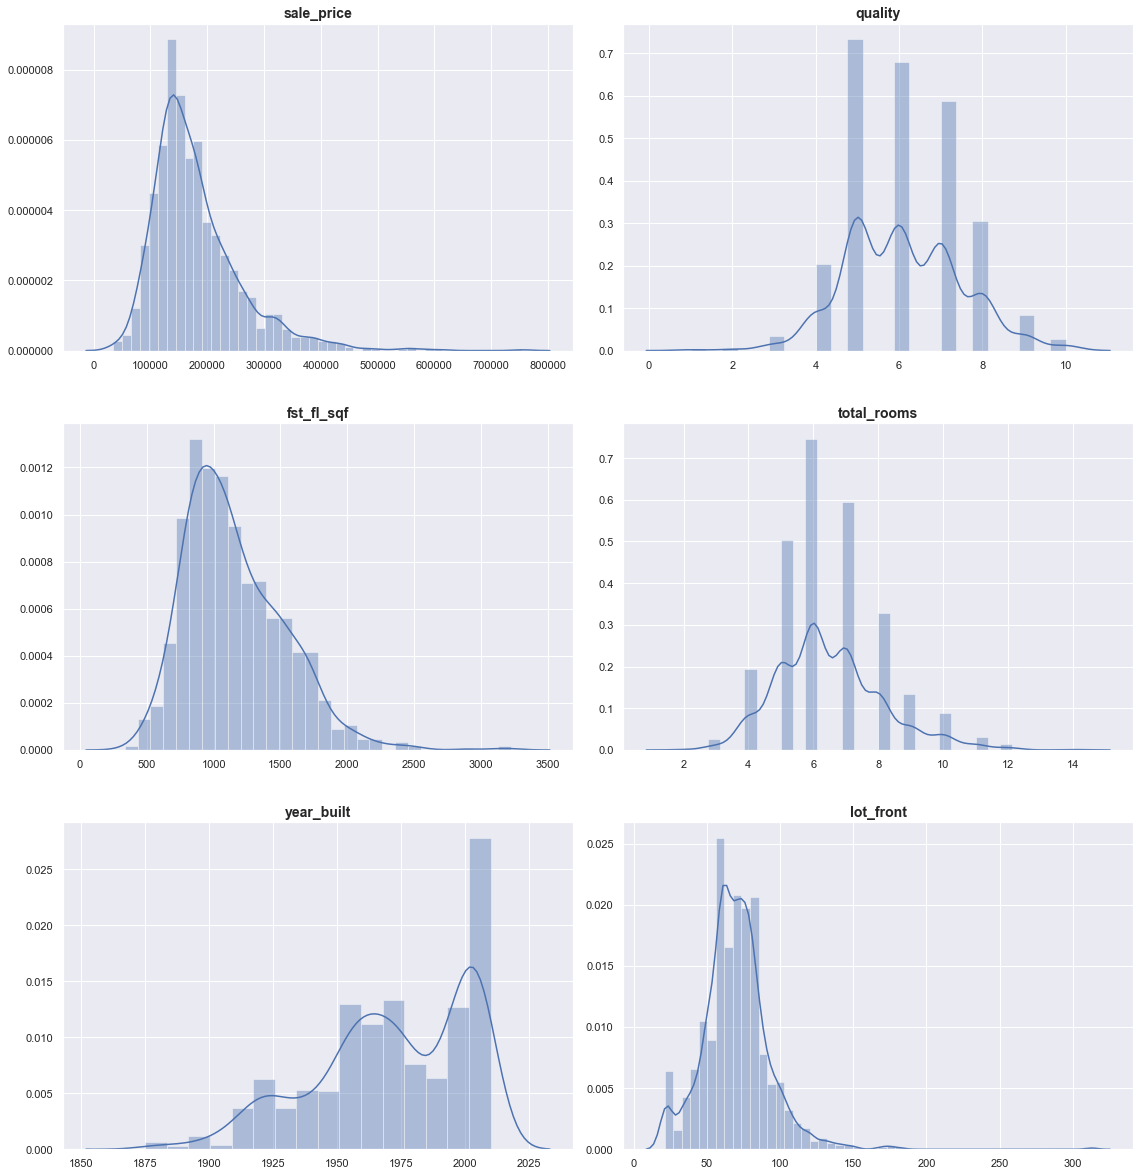

In [44]:
n = len(variables)
cols = 2
rows = n // cols

fig,ax = plt.subplots(rows, cols, figsize=(16,n*2.75))

i = 0
for name, values in variables.items():
    current_ax = ax[i//cols][i%cols]
    current_ax.set_title(name,  weight='bold').set_fontsize(14)
    sb.distplot(values[~np.isnan(values)],  ax=current_ax)
    i+=1

fig.tight_layout(h_pad=3)